<a href="https://colab.research.google.com/github/ertgrulyksk/Starbucks-Customer-Survey/blob/main/Starbucks_Customer_Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Starbucks satisfactory survey.csv')

In [5]:
df

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2019/10/04 12:24:26 AM GMT+8,Male,40 and above,Self-employed,"RM25,000 - RM50,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,...,Around RM20 - RM40,3,3,5,3,2,4,4,Starbucks Website/Apps;Social Media,Yes
118,2019/10/04 9:30:09 AM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,...,More than RM40,5,5,5,5,5,5,5,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
119,2019/10/04 1:46:07 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,No,...,Less than RM20,3,2,4,3,3,3,4,Social Media;Through friends and word of mouth...,No
120,2019/10/05 11:01:14 AM GMT+8,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Below 30 minutes,within 1km,No,...,Less than RM20,4,4,4,4,4,4,4,Social Media;Through friends and word of mouth...,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                  --------------  ----- 
 0   Timestamp                                                                                                               122 non-null    object
 1   1. Your Gender                                                                                                          122 non-null    object
 2   2. Your Age                                                                                                             122 non-null    object
 3   3. Are you currently....?                                                                                               122 non-null    object
 4   4.

In [7]:
df_new = df.rename(columns={"1. Your Gender": 'Gender',
                                "2. Your Age": "ageGroup",
                                "3. Are you currently....?":"status",
                                "4. What is your annual income?":"annualIncome",
                                "5. How often do you visit Starbucks?":"visitFrequency",
                                "6. How do you usually enjoy Starbucks?":"Method",
                                "7. How much time do you normally  spend during your visit?":"timeCost",
                                "8. The nearest Starbucks's outlet to you is...?":"location",
                                "9. Do you have Starbucks membership card?":"membership",
                                "10. What do you most frequently purchase at Starbucks?":"mostPurchase",
                                "11. On average, how much would you spend at Starbucks per visit?":"moneySpend",
                                 }, inplace=False)

In [8]:
fig = px.histogram(df_new, x="visitFrequency")
fig.update_layout(barmode='stack')
fig.show()

In [9]:
dfT = df_new['timeCost'].value_counts()
dfT = pd.DataFrame({'Time':dfT.index, 'Counts':dfT.values})

labels = dfT['Time']
values = dfT['Counts']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In [10]:
dfP = df_new['mostPurchase'].value_counts()
dfP = pd.DataFrame({'Product':dfP.index, 'Counts':dfP.values})

labels = dfP['Product']
values = dfP['Counts']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()

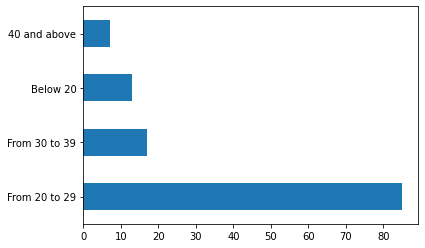

In [11]:
df_new['ageGroup'].value_counts().plot(kind='barh')

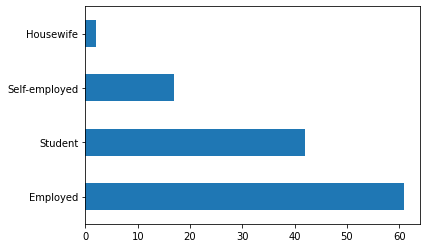

In [12]:
df_new['status'].value_counts().plot(kind='barh')

In [13]:
ls = ['1. Your Gender',
 '2. Your Age',
 '3. Are you currently....?',
 '4. What is your annual income?',
 '5. How often do you visit Starbucks?',
 '6. How do you usually enjoy Starbucks?',
 '7. How much time do you normally  spend during your visit?',
 "8. The nearest Starbucks's outlet to you is...?",
 '9. Do you have Starbucks membership card?',
 '11. On average, how much would you spend at Starbucks per visit?',
 '20. Will you continue buying at Starbucks?']
ls
for i in ls:
    unique_vals = df[i].unique()
    df[i].replace(to_replace=unique_vals,
           value= list(range(len(unique_vals))),
           inplace=True)

In [14]:
df

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,0,0,0,0,0,0,0,0,0,...,0,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,0
1,2019/10/01 12:38:54 PM GMT+8,0,0,0,0,0,1,1,1,0,...,0,4,3,4,4,4,5,2,Social Media;In Store displays,0
2,2019/10/01 12:38:56 PM GMT+8,1,0,1,0,1,0,0,2,0,...,0,4,3,4,4,4,4,3,In Store displays;Billboards,0
3,2019/10/01 12:39:08 PM GMT+8,0,0,0,0,0,1,1,2,1,...,0,2,1,4,3,3,3,3,Through friends and word of mouth,1
4,2019/10/01 12:39:20 PM GMT+8,1,0,0,0,1,1,0,1,1,...,1,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2019/10/04 12:24:26 AM GMT+8,1,2,2,2,1,0,3,1,0,...,1,3,3,5,3,2,4,4,Starbucks Website/Apps;Social Media,0
118,2019/10/04 9:30:09 AM GMT+8,1,0,1,0,1,0,3,1,0,...,2,5,5,5,5,5,5,5,Starbucks Website/Apps;Social Media;Emails;Dea...,0
119,2019/10/04 1:46:07 PM GMT+8,1,0,0,0,0,0,0,1,1,...,0,3,2,4,3,3,3,4,Social Media;Through friends and word of mouth...,1
120,2019/10/05 11:01:14 AM GMT+8,0,0,1,0,0,1,1,0,1,...,0,4,4,4,4,4,4,4,Social Media;Through friends and word of mouth...,0


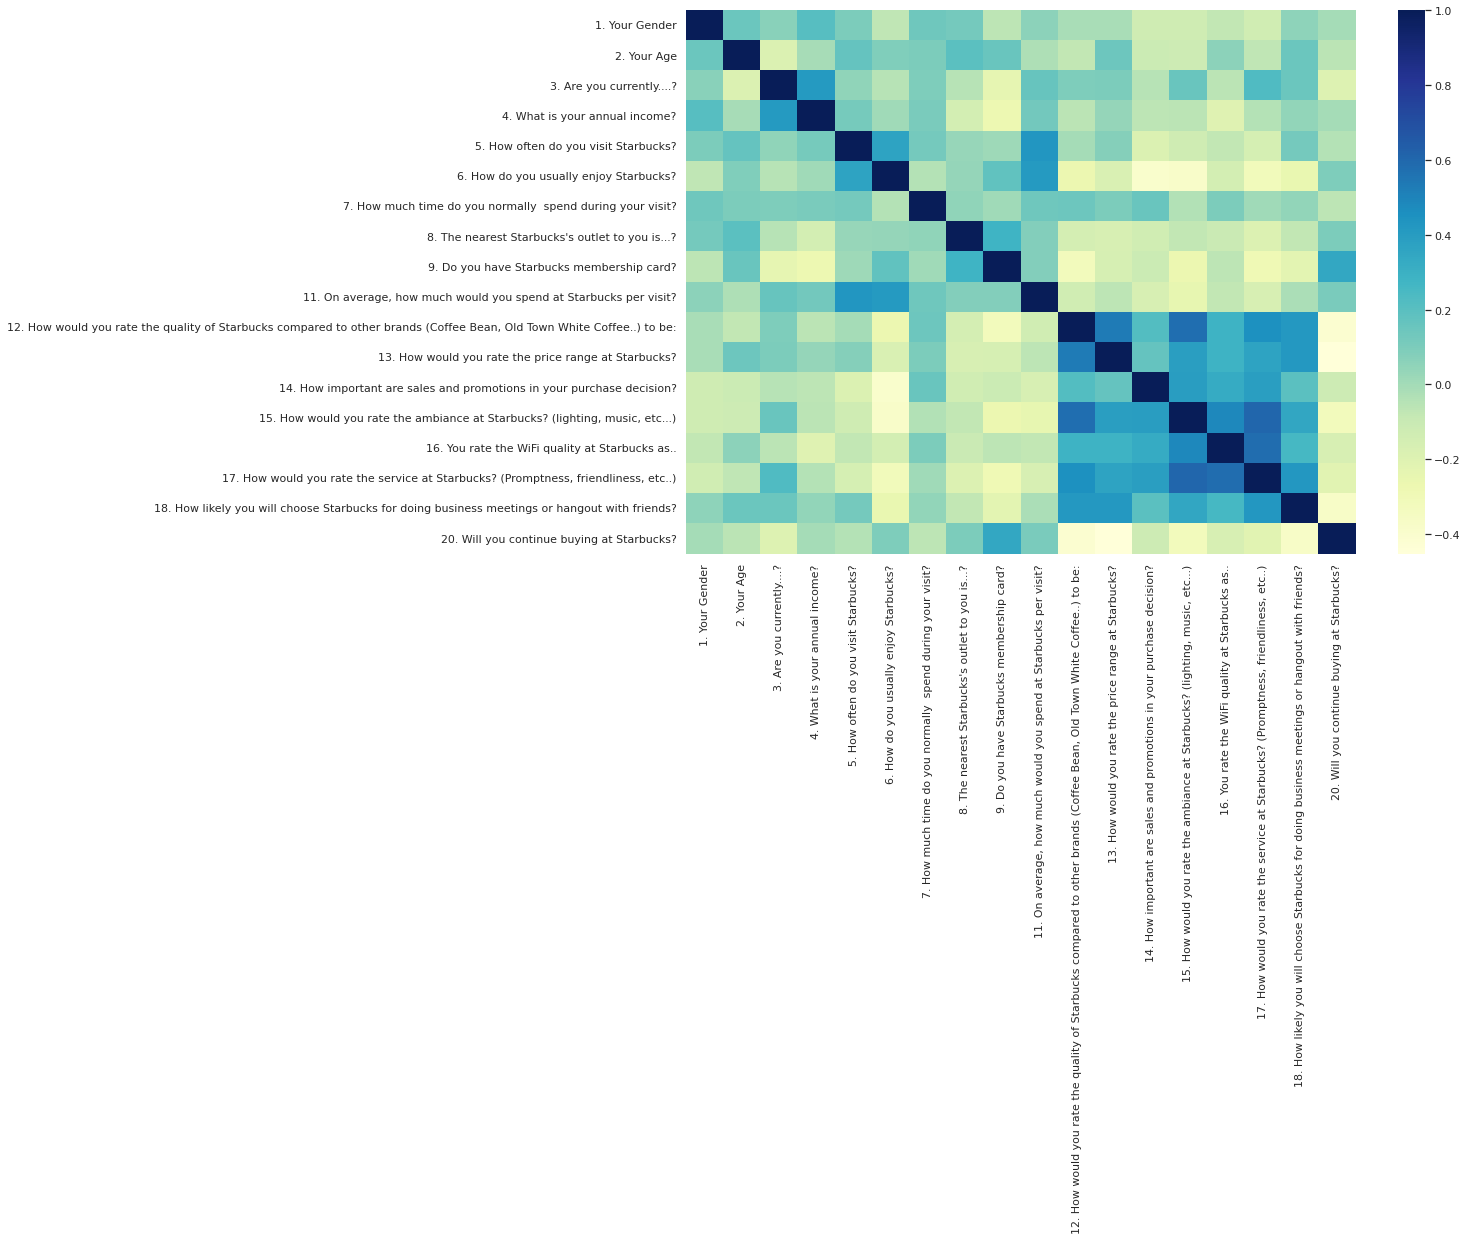

In [15]:
corrMatrix = df.corr()
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(corrMatrix,cmap="YlGnBu")
plt.show()

In [17]:
df_new = df_new.rename(columns = 
                       {"12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:":"ComparingRate",
                        "13. How would you rate the price range at Starbucks?":"PriceRate",
                        "14. How important are sales and promotions in your purchase decision?":"s&pCareness",
                        "15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)":"AmbientRate",
                        "16. You rate the WiFi quality at Starbucks as..":"WifiRate",
                        "17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)":"ServiceRate",
                        "18. How likely you will choose Starbucks for doing business meetings or hangout with friends?":"MhRating"
                        })


Score = {}
Score['Comparing with other coffee shop']=df_new['ComparingRate'].sum()
Score['Price']=df_new['PriceRate'].sum()
Score['Ambient'] = df_new['AmbientRate'].sum()
Score['Wifi'] = df_new['WifiRate'].sum()
Score['Service'] = df_new['ServiceRate'].sum()
Score['MhRating'] = df_new['MhRating'].sum()

score_df = pd.DataFrame(Score.items(), columns=['part','score'])
score_df

fig = px.bar(score_df, x='part', y='score', title='Importance of aspects for the customer')
fig.show()